In [1]:
import sys
sys.path.append('../')  
import pandas as pd
import matplotlib.pyplot as plt
import time

from src.data.collector.brasil_bitcoin import LoadBrasilBitcoin
from src.data.collector.bitso_bitcoin import LoadBitsoBitcoin
from src.data.collector.bitypreco_bitcoin import LoadBityBitcoin
from src.data.collector.bitcoin_to_you import LoadBitcoinToYou
from src.data.collector.mercado_bitcoin import LoadMercadoBitcoin
from src.data.collector.ripio_bitcoin import LoadRipioTrade

def change_types(data):
        data['preco'] = data['preco'].astype(float)
        data['quantidade'] = data['quantidade'].astype(float)
        return data

delay = 0.1
price_range = 50  # Price range for analysis


lbb = LoadBrasilBitcoin()
lbitso = LoadBitsoBitcoin()
lbity = LoadBityBitcoin()
ltyou = LoadBitcoinToYou()
lmerc = LoadMercadoBitcoin()
lripio = LoadRipioTrade()


ob_brasil_bitcoin = lbb.get_brasil_bitcoin_orderbook()
ob_bitso_bitcoin = lbitso.get_bitso_bitcoin_orderbook()
ob_bity_bitcoin = lbity.get_bity_bitcoin_orderbook()
ob_to_you = ltyou.get_btou_bitcoin_orderbook()
ob_mercado_bit = lmerc.get_mercado_bitcoin_orderbook()
ob_ripio = lripio.get_ripio_bitcoin_orderbook()

orderbook = pd.concat([ob_brasil_bitcoin, ob_bity_bitcoin,  ob_mercado_bit, ob_ripio], ignore_index=True)

#ob_bitso_bitcoin, ob_to_you,

#orderbook = pd.concat([ob_mercado_bit, ob_bity_bitcoin])
orderbook = change_types(orderbook)



orderbook_compra = orderbook.loc[orderbook['compra_venda'] == 'compra'].sort_values(by=['preco', 'empresa'], ascending=False).reset_index(drop=True)
orderbook_venda = orderbook.loc[orderbook['compra_venda'] == 'venda'].sort_values(by=['preco', 'empresa'], ascending=True).reset_index(drop=True)

#.sort_values(by=['preco', 'empresa'])



# orderbook_vendas = orderbook.loc[orderbook['compra_venda'] == 'venda'].sort_values('preco', ascending=True).reset_index(drop=True)

orderbook_compra['Buy'] = orderbook_compra.groupby('empresa')['quantidade'].cumsum()
orderbook_venda['Sell'] = orderbook_venda.groupby('empresa')['quantidade'].cumsum()

#orderbook_compra['Buy'] = orderbook_compra[orderbook_compra['compra_venda'] == 'compra']['quantidade'].cumsum()
#orderbook_venda['Sell'] = orderbook_venda[orderbook_venda['compra_venda'] == 'venda']['quantidade'].cumsum()



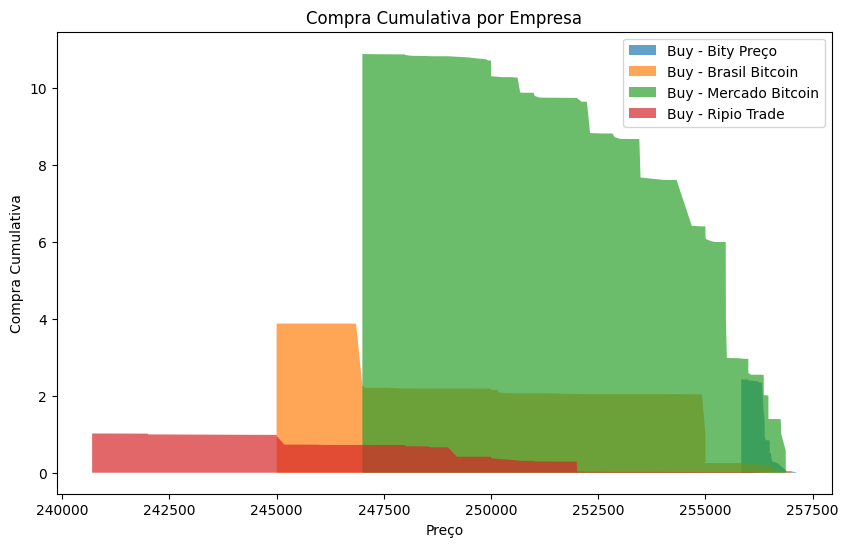

In [2]:
empresas = orderbook_compra['empresa'].unique()

# Configurar o plot
plt.figure(figsize=(10, 6))
plt.title('Compra Cumulativa por Empresa')
plt.xlabel('Preço')
plt.ylabel('Compra Cumulativa')

# Plotar para cada empresa
for empresa in empresas:
    subset = orderbook_compra[orderbook_compra['empresa'] == empresa]
    plt.fill_between(subset['preco'], subset['Buy'], alpha=0.7, label=f'Buy - {empresa}')

# Adicionar legenda e exibir o gráfico
plt.legend()
plt.show()

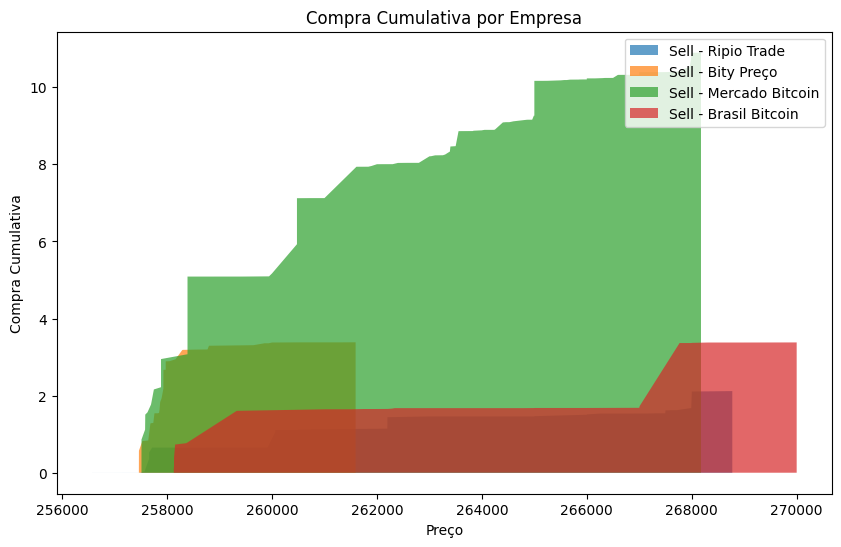

In [3]:
empresas = orderbook_venda['empresa'].unique()

# Configurar o plot
plt.figure(figsize=(10, 6))
plt.title('Compra Cumulativa por Empresa')
plt.xlabel('Preço')
plt.ylabel('Compra Cumulativa')

# Plotar para cada empresa
for empresa in empresas:
    subset = orderbook_venda[orderbook_venda['empresa'] == empresa]
    plt.fill_between(subset['preco'], subset['Sell'], alpha=0.7, label=f'Sell - {empresa}')

# Adicionar legenda e exibir o gráfico
plt.legend()
plt.show()

# Normalização

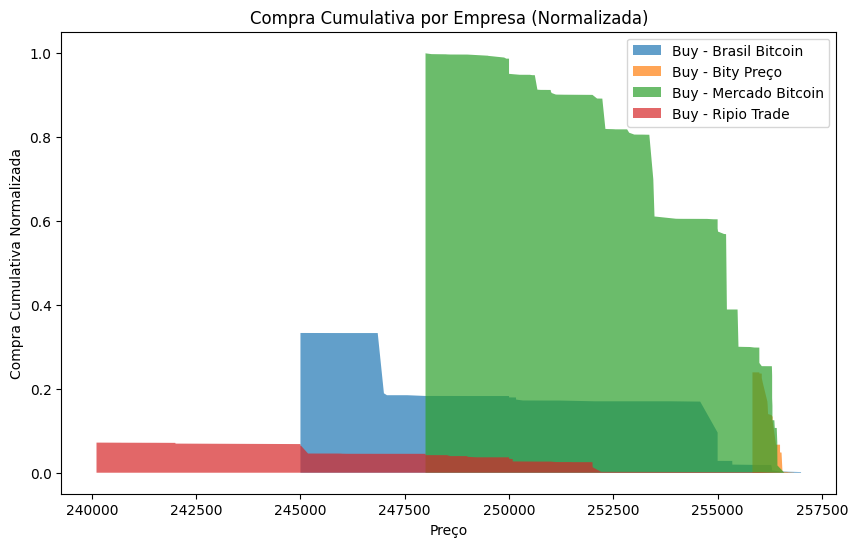

In [7]:
import sys
sys.path.append('../')  
import pandas as pd
import matplotlib.pyplot as plt

from src.data.collector.brasil_bitcoin import LoadBrasilBitcoin
from src.data.collector.bitso_bitcoin import LoadBitsoBitcoin
from src.data.collector.bitypreco_bitcoin import LoadBityBitcoin
from src.data.collector.bitcoin_to_you import LoadBitcoinToYou
from src.data.collector.mercado_bitcoin import LoadMercadoBitcoin
from src.data.collector.ripio_bitcoin import LoadRipioTrade

def change_types(data):
    data['preco'] = data['preco'].astype(float)
    data['quantidade'] = data['quantidade'].astype(float)
    return data

lbb = LoadBrasilBitcoin()
lbitso = LoadBitsoBitcoin()
lbity = LoadBityBitcoin()
ltyou = LoadBitcoinToYou()
lmerc = LoadMercadoBitcoin()
lripio = LoadRipioTrade()

ob_brasil_bitcoin = lbb.get_brasil_bitcoin_orderbook()
ob_bitso_bitcoin = lbitso.get_bitso_bitcoin_orderbook()
ob_bity_bitcoin = lbity.get_bity_bitcoin_orderbook()
ob_to_you = ltyou.get_btou_bitcoin_orderbook()
ob_mercado_bit = lmerc.get_mercado_bitcoin_orderbook()
ob_ripio = lripio.get_ripio_bitcoin_orderbook()

orderbook = pd.concat([ob_brasil_bitcoin, ob_bity_bitcoin,  ob_mercado_bit, ob_ripio], ignore_index=True)
orderbook = change_types(orderbook)

orderbook_compra = orderbook.loc[orderbook['compra_venda'] == 'compra'].sort_values(by=['preco', 'empresa'], ascending=False).reset_index(drop=True)
orderbook_venda = orderbook.loc[orderbook['compra_venda'] == 'venda'].sort_values(by=['preco', 'empresa'], ascending=True).reset_index(drop=True)

orderbook_compra['Buy'] = orderbook_compra.groupby('empresa')['quantidade'].cumsum()
orderbook_venda['Sell'] = orderbook_venda.groupby('empresa')['quantidade'].cumsum()

# Normalizar
max_buy = orderbook_compra['Buy'].max()
max_sell = orderbook_venda['Sell'].max()
max_value =  max_buy #max(max_buy, max_sell)

orderbook_compra['Buy'] = orderbook_compra['Buy'] / max_value
orderbook_venda['Sell'] = orderbook_venda['Sell'] / max_value

empresas = orderbook_compra['empresa'].unique()

plt.figure(figsize=(10, 6))
plt.title('Compra Cumulativa por Empresa (Normalizada)')
plt.xlabel('Preço')
plt.ylabel('Compra Cumulativa Normalizada')

for empresa in empresas:
    subset = orderbook_compra[orderbook_compra['empresa'] == empresa]
    plt.fill_between(subset['preco'], subset['Buy'], alpha=0.7, label=f'Buy - {empresa}')

plt.legend()
plt.show()


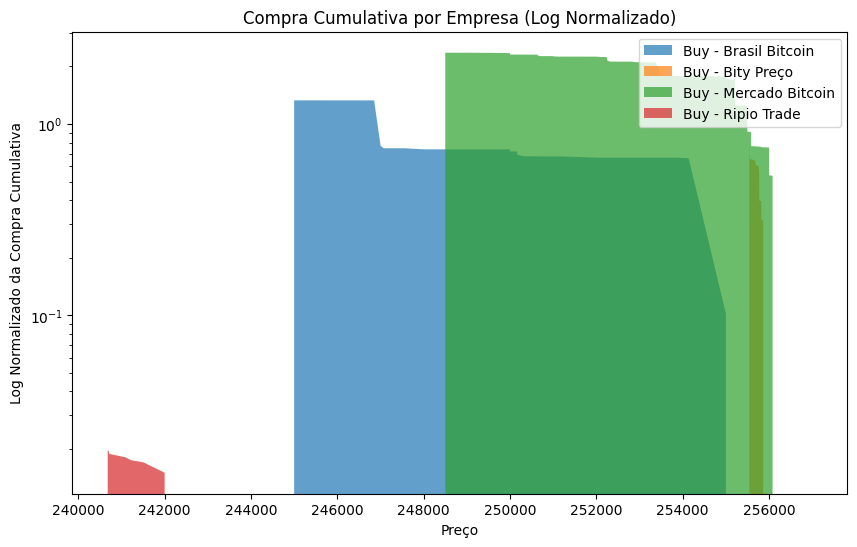

In [10]:
import sys
sys.path.append('../')  
import pandas as pd
import matplotlib.pyplot as plt

from src.data.collector.brasil_bitcoin import LoadBrasilBitcoin
from src.data.collector.bitso_bitcoin import LoadBitsoBitcoin
from src.data.collector.bitypreco_bitcoin import LoadBityBitcoin
from src.data.collector.bitcoin_to_you import LoadBitcoinToYou
from src.data.collector.mercado_bitcoin import LoadMercadoBitcoin
from src.data.collector.ripio_bitcoin import LoadRipioTrade

def change_types(data):
    data['preco'] = data['preco'].astype(float)
    data['quantidade'] = data['quantidade'].astype(float)
    return data

lbb = LoadBrasilBitcoin()
lbitso = LoadBitsoBitcoin()
lbity = LoadBityBitcoin()
ltyou = LoadBitcoinToYou()
lmerc = LoadMercadoBitcoin()
lripio = LoadRipioTrade()

ob_brasil_bitcoin = lbb.get_brasil_bitcoin_orderbook()
ob_bitso_bitcoin = lbitso.get_bitso_bitcoin_orderbook()
ob_bity_bitcoin = lbity.get_bity_bitcoin_orderbook()
ob_to_you = ltyou.get_btou_bitcoin_orderbook()
ob_mercado_bit = lmerc.get_mercado_bitcoin_orderbook()
ob_ripio = lripio.get_ripio_bitcoin_orderbook()

orderbook = pd.concat([ob_brasil_bitcoin, ob_bity_bitcoin,  ob_mercado_bit, ob_ripio], ignore_index=True)
orderbook = change_types(orderbook)

orderbook_compra = orderbook.loc[orderbook['compra_venda'] == 'compra'].sort_values(by=['preco', 'empresa'], ascending=False).reset_index(drop=True)
orderbook_venda = orderbook.loc[orderbook['compra_venda'] == 'venda'].sort_values(by=['preco', 'empresa'], ascending=True).reset_index(drop=True)

orderbook_compra['Buy'] = orderbook_compra.groupby('empresa')['quantidade'].cumsum()
orderbook_venda['Sell'] = orderbook_venda.groupby('empresa')['quantidade'].cumsum()

# Aplicar logaritmo
orderbook_compra['Buy'] = orderbook_compra['Buy'].apply(lambda x: 0 if x == 0 else np.log(x))
orderbook_venda['Sell'] = orderbook_venda['Sell'].apply(lambda x: 0 if x == 0 else np.log(x))

empresas = orderbook_compra['empresa'].unique()

plt.figure(figsize=(10, 6))
plt.title('Compra Cumulativa por Empresa (Log Normalizado)')
plt.xlabel('Preço')
plt.ylabel('Log Normalizado da Compra Cumulativa')

for empresa in empresas:
    subset = orderbook_compra[orderbook_compra['empresa'] == empresa]
    plt.fill_between(subset['preco'], subset['Buy'], alpha=0.7, label=f'Buy - {empresa}')

# Configurando escala logarítmica no eixo y
plt.yscale('log')

plt.legend()
plt.show()
